In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew
import random

In [2]:
wineQT = pd.read_csv("C://Users//Ambarish Deb//Downloads//WineQT.csv")
wineQT.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Cleaning, Outlier Handling

In [3]:
wineQT.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
del wineQT['Id']
wineQT.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:

wineQT.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
from scipy import stats
z = np.abs(stats.zscore(wineQT))

threshold = 3

#Keep rows with Z-score less than 3
wineQT = wineQT[(z < 3).all(axis=1)]
wineQT.shape

(1041, 12)

# EDA, Data Visualization

In [7]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
list(wineQT.columns)[:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

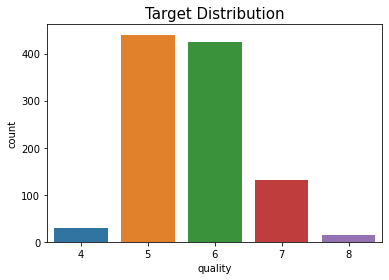

In [8]:
sns.countplot(x=wineQT.quality).set_title('Target Distribution',size=15)
plt.show()

## Inference-
### Most of the wines are rated as either a 5 or a 6. 

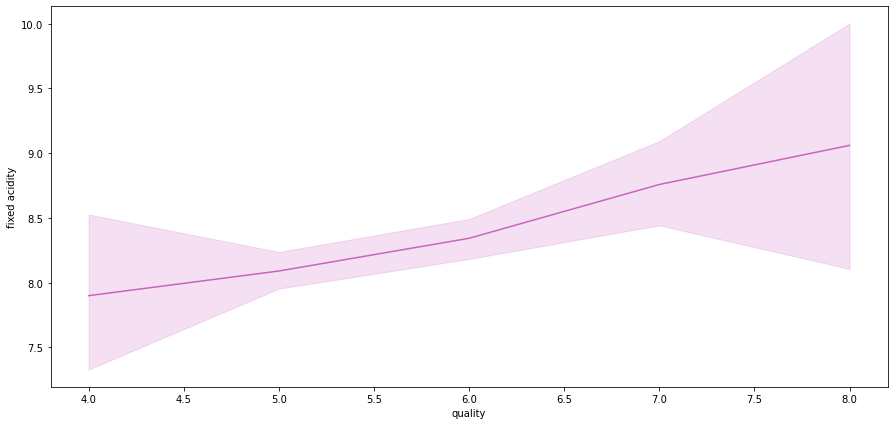

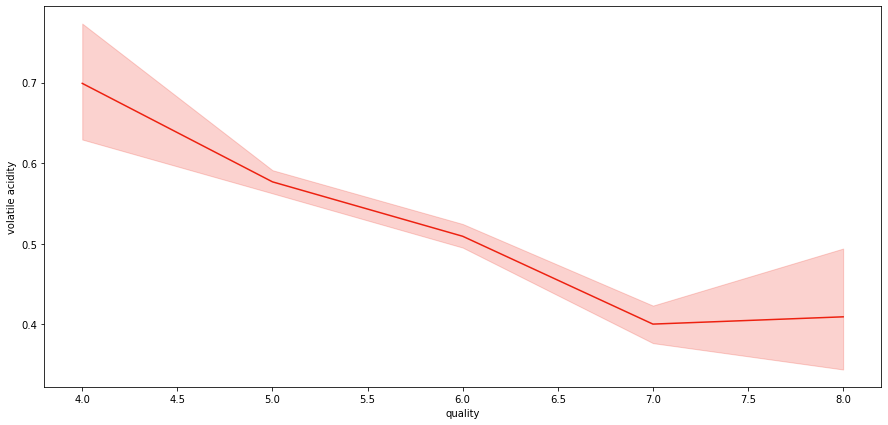

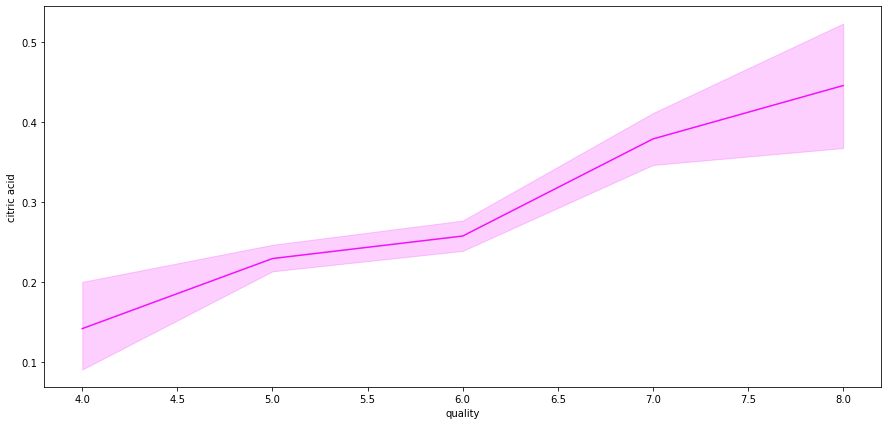

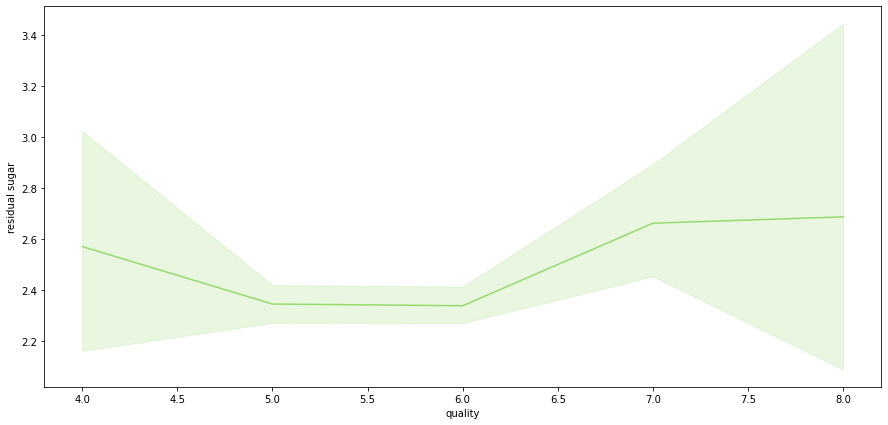

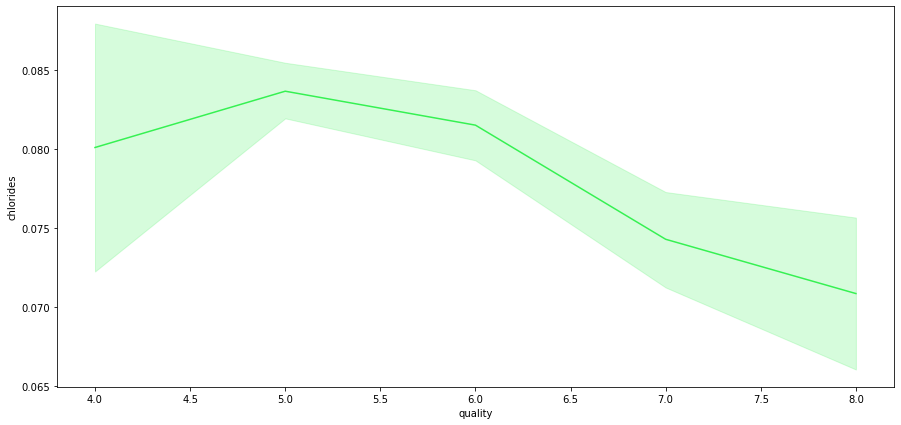

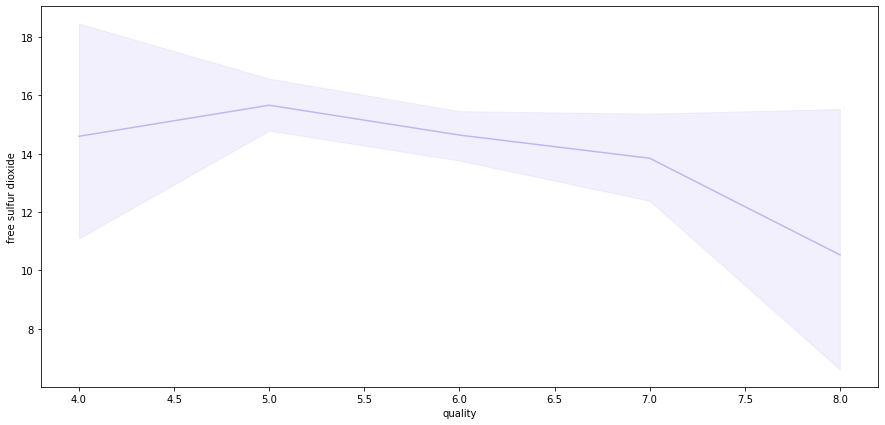

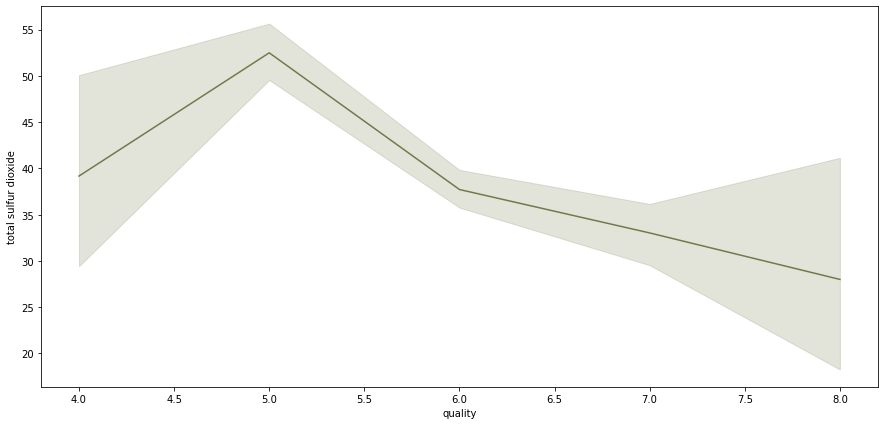

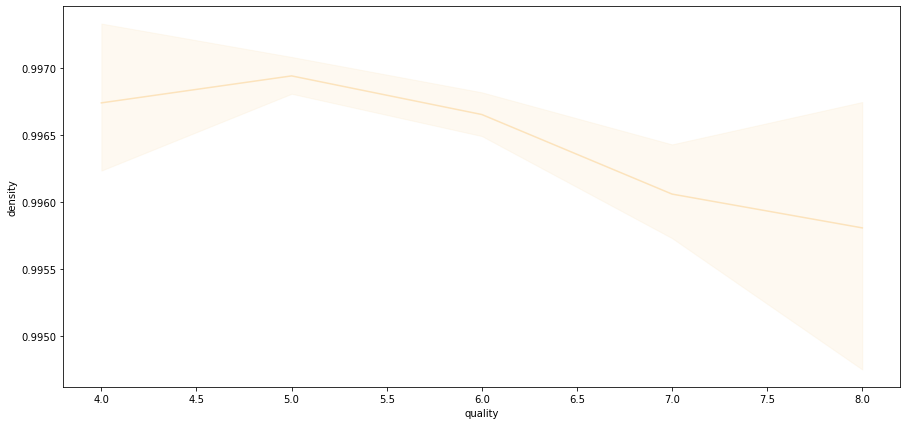

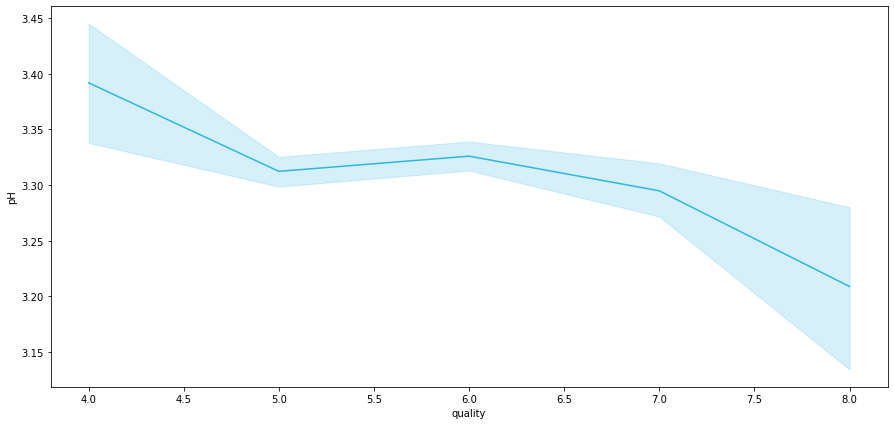

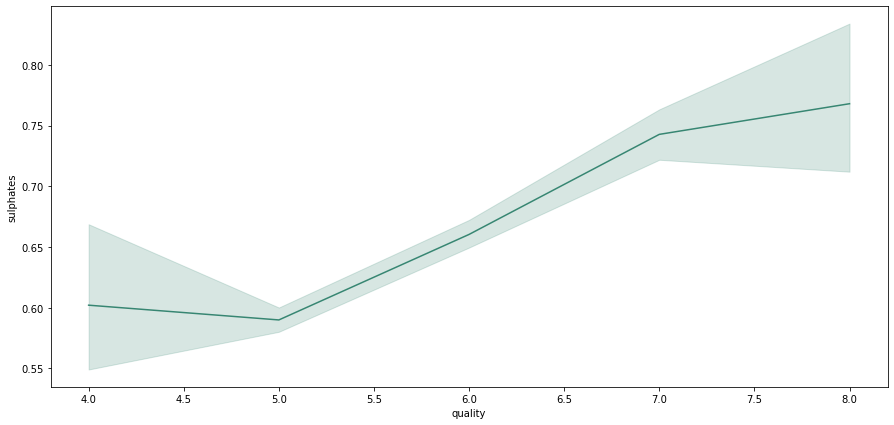

In [9]:
for col in list(wineQT.columns[:-2]):    
    plt.figure(figsize=(15,7))
    sns.lineplot(data=wineQT, x="quality",y=col,color=randomcolor())
    plt.show()

## inferences-
### 1. clear increases with increase in quality- fixed acidity, citric acid
### 2. clearly decreases with decrease in quality- null
### 3. mostly increases - sulphates
### 4. mostly decreases- density, pH, total SO2, free SO2,chlorides,volatile acidity
### 3. mixed/no trend- residual sugar 

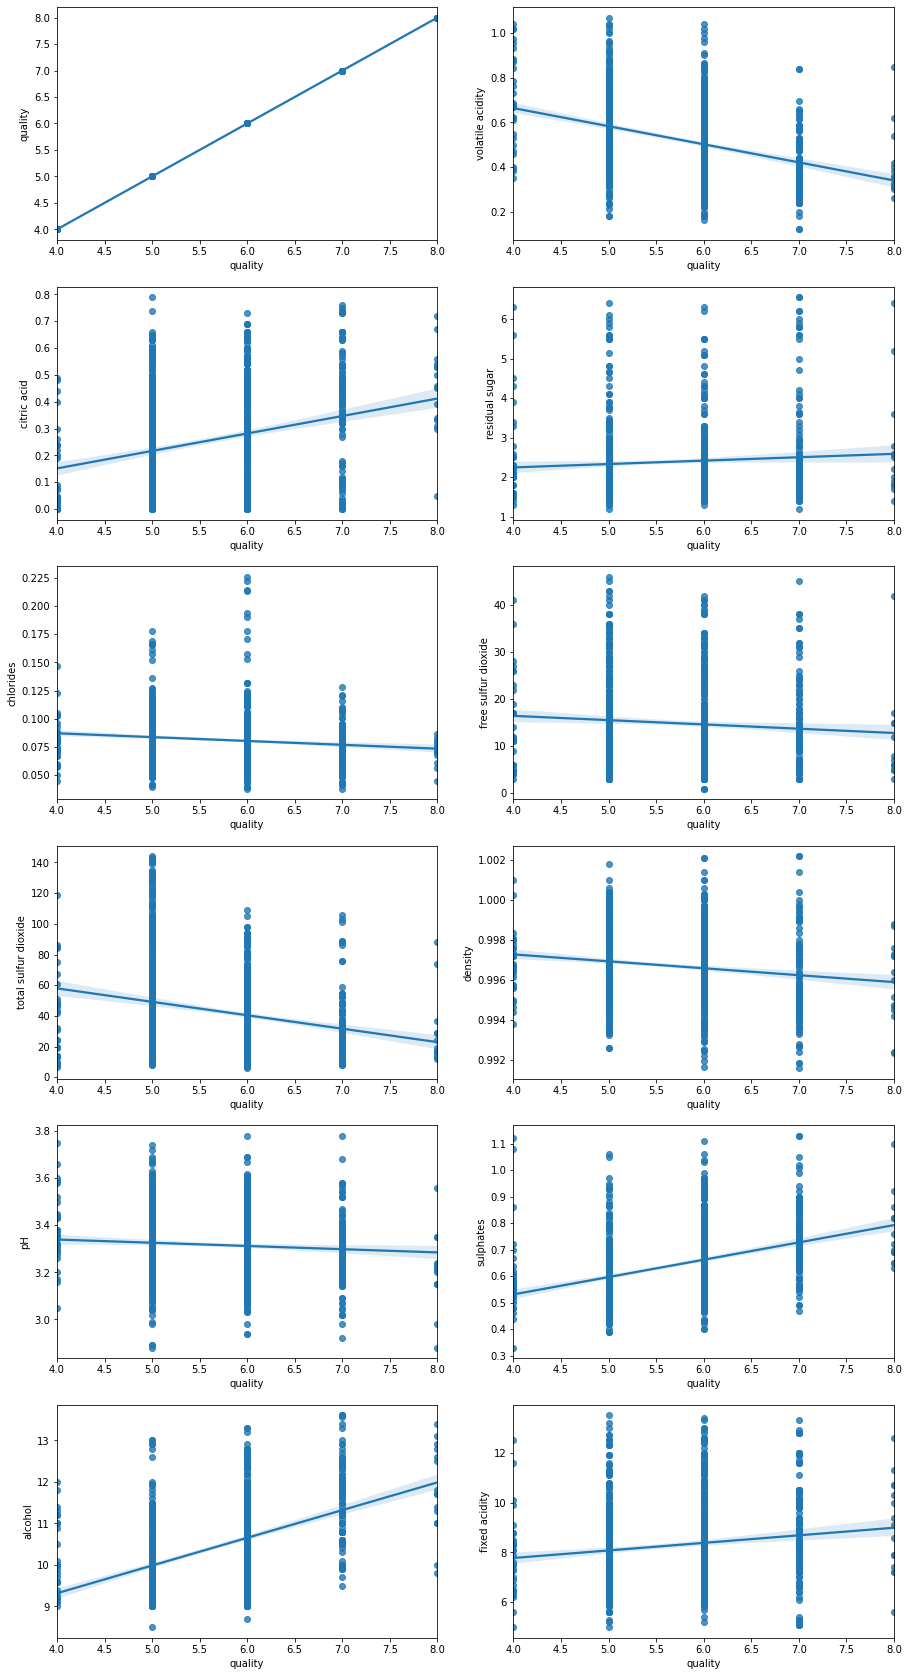

In [10]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.regplot(x=wineQT.quality,y=wineQT.quality,ax=ax[0][0])
sns.regplot(x=wineQT.quality,y=wineQT['volatile acidity'],ax=ax[0][1])
sns.regplot(x=wineQT.quality,y=wineQT['citric acid'],ax=ax[1][0])
sns.regplot(x=wineQT.quality,y=wineQT['residual sugar'],ax=ax[1][1])
sns.regplot(x=wineQT.quality,y=wineQT['chlorides'],ax=ax[2][0])
sns.regplot(x=wineQT.quality,y=wineQT['free sulfur dioxide'],ax=ax[2][1])
sns.regplot(x=wineQT.quality,y=wineQT['total sulfur dioxide'],ax=ax[3][0])
sns.regplot(x=wineQT.quality,y=wineQT['density'],ax=ax[3][1])
sns.regplot(x=wineQT.quality,y=wineQT['pH'],ax=ax[4][0])
sns.regplot(x=wineQT.quality,y=wineQT['sulphates'],ax=ax[4][1])
sns.regplot(x=wineQT.quality,y=wineQT['alcohol'],ax=ax[5][0])
sns.regplot(x=wineQT.quality,y=wineQT['fixed acidity'],ax=ax[5][1])

plt.show()

## Inferences-
### 1. negative correlation between volatile acidity & quality

### 2. positive correlation between citric acid & quality

### 3. slight positive correlation between residual sugar & quality

### 4. slight negative correlation between chlorides & quality

### 5.  slight negative correlation between free sulfur dioxide & quality

### 6.  negative correlation between total sulfur dioxide & quality

### 7.  slight negative correlation between density & quality

### 8.  slight negative correlation between pH & quality

### 9.  positive correlation between sulphates & quality

### 10. positive correlation between alcohol & quality

### 11.  slight  positive correlation between fixed acidity & quality

## Summary

### positive- citric acid, sulphates,alcohol
### slightly positive- residual sugar, sulphates, fixed acidity
### slightly negative - chlorides, density, pH
### negative - volatile acidity, total sulfur dioxide

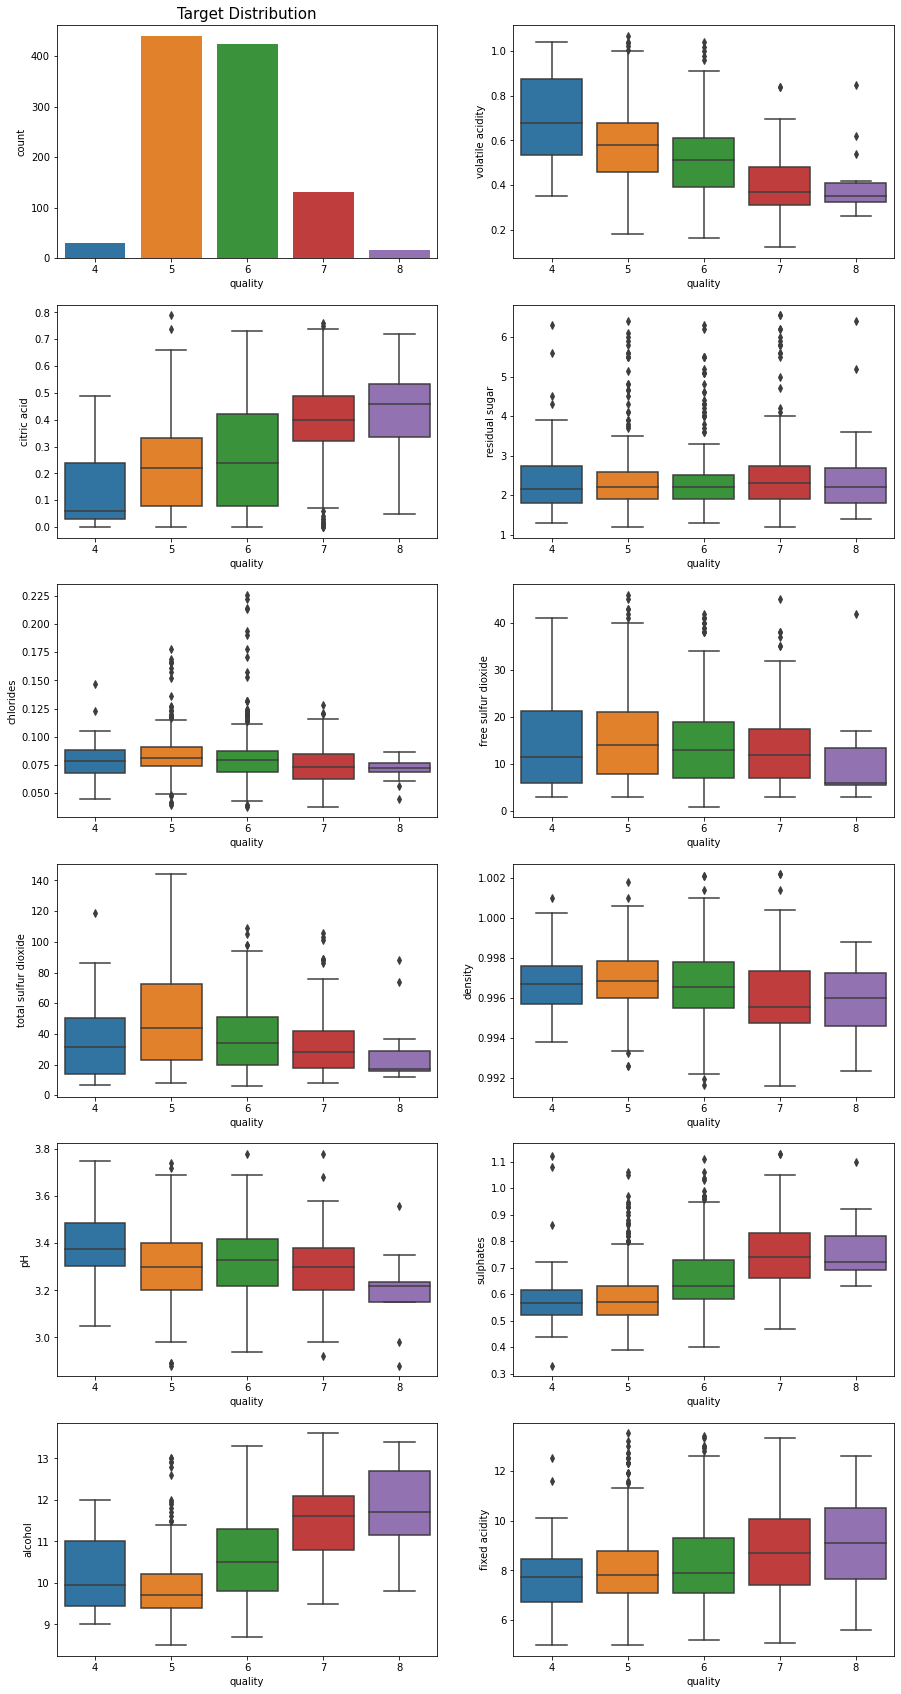

In [11]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.countplot(x=wineQT.quality,ax=ax[0][0]).set_title('Target Distribution',size=15)
sns.boxplot(x=wineQT.quality,y=wineQT['volatile acidity'],ax=ax[0][1])
sns.boxplot(x=wineQT.quality,y=wineQT['citric acid'],ax=ax[1][0])
sns.boxplot(x=wineQT.quality,y=wineQT['residual sugar'],ax=ax[1][1])
sns.boxplot(x=wineQT.quality,y=wineQT['chlorides'],ax=ax[2][0])
sns.boxplot(x=wineQT.quality,y=wineQT['free sulfur dioxide'],ax=ax[2][1])
sns.boxplot(x=wineQT.quality,y=wineQT['total sulfur dioxide'],ax=ax[3][0])
sns.boxplot(x=wineQT.quality,y=wineQT['density'],ax=ax[3][1])
sns.boxplot(x=wineQT.quality,y=wineQT['pH'],ax=ax[4][0])
sns.boxplot(x=wineQT.quality,y=wineQT['sulphates'],ax=ax[4][1])
sns.boxplot(x=wineQT.quality,y=wineQT['alcohol'],ax=ax[5][0])
sns.boxplot(x=wineQT.quality,y=wineQT['fixed acidity'],ax=ax[5][1])
plt.show()

## Skewness

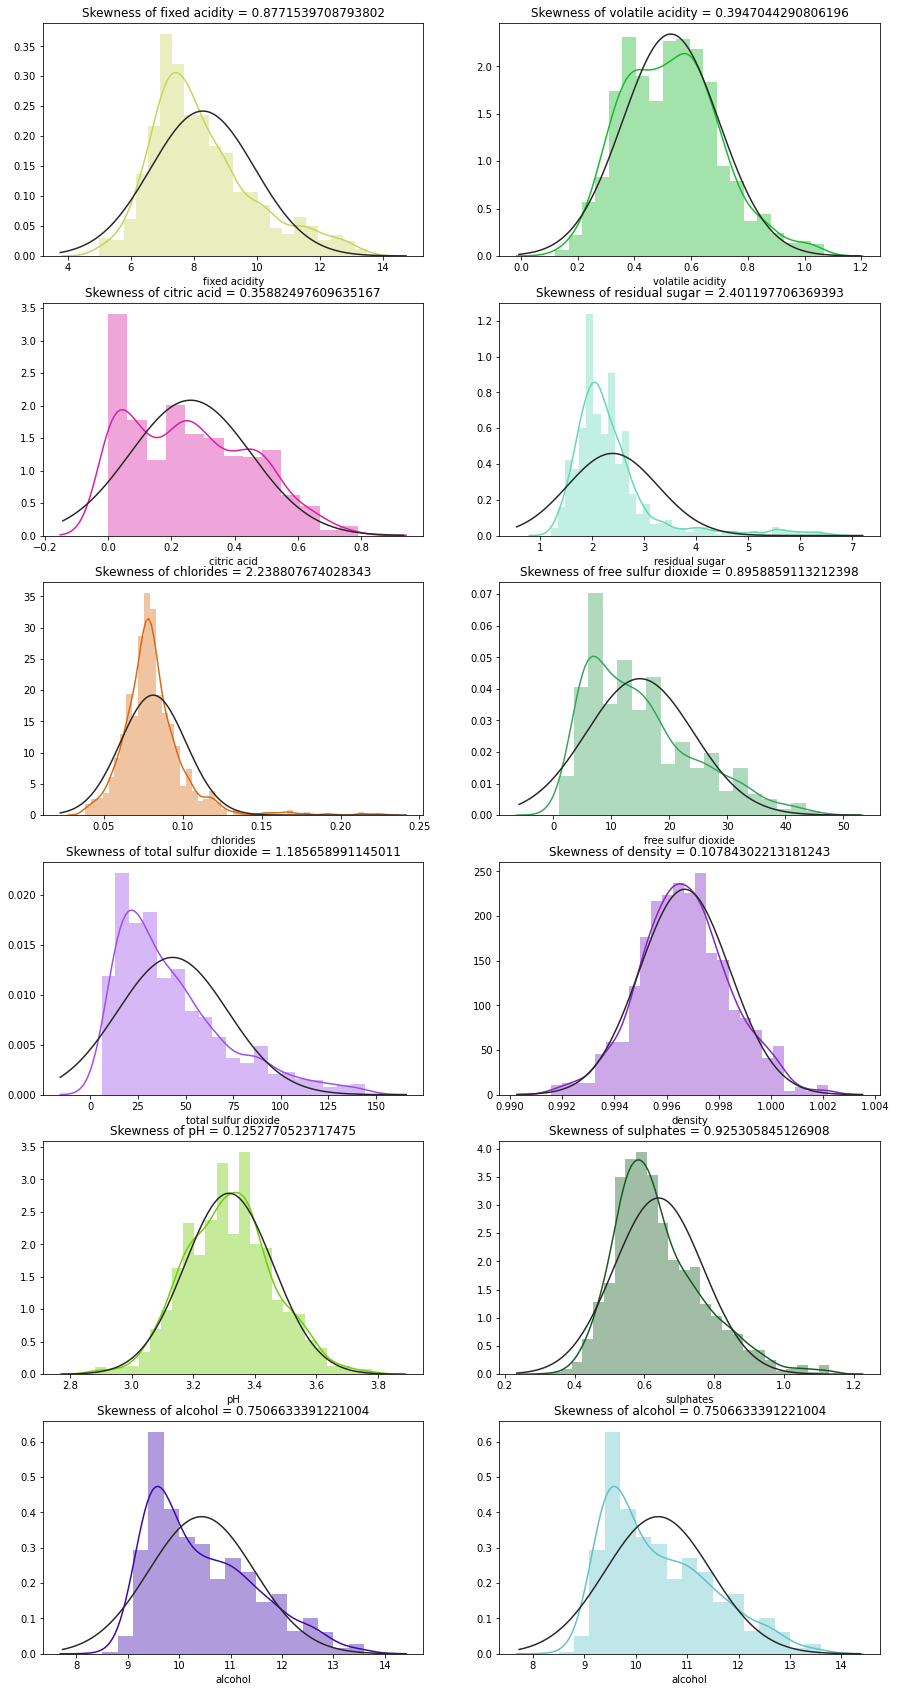

In [12]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
skewness = str(skew(wineQT['fixed acidity']))
sns.distplot(wineQT['fixed acidity'],fit = norm,color = randomcolor(),ax=ax[0][0]).set_title("Skewness of " + 'fixed acidity'+ ' = '+ skewness)
skewness = str(skew(wineQT['volatile acidity']))
sns.distplot(wineQT['volatile acidity'],fit = norm,color = randomcolor(),ax=ax[0][1]).set_title("Skewness of " + 'volatile acidity'+ ' = '+ skewness)
skewness = str(skew(wineQT['citric acid']))
sns.distplot(wineQT['citric acid'],fit = norm,color = randomcolor(),ax=ax[1][0]).set_title("Skewness of " + 'citric acid'+ ' = '+ skewness)
skewness = str(skew(wineQT['residual sugar']))
sns.distplot(wineQT['residual sugar'],fit = norm,color = randomcolor(),ax=ax[1][1]).set_title("Skewness of " + 'residual sugar'+ ' = '+ skewness)
skewness = str(skew(wineQT['chlorides']))
sns.distplot(wineQT['chlorides'],fit = norm,color = randomcolor(),ax=ax[2][0]).set_title("Skewness of " + 'chlorides'+ ' = '+ skewness)
skewness = str(skew(wineQT['free sulfur dioxide']))
sns.distplot(wineQT['free sulfur dioxide'],fit = norm,color = randomcolor(),ax=ax[2][1]).set_title("Skewness of " + 'free sulfur dioxide'+ ' = '+ skewness)
skewness = str(skew(wineQT['total sulfur dioxide']))
sns.distplot(wineQT['total sulfur dioxide'],fit = norm,color = randomcolor(),ax=ax[3][0]).set_title("Skewness of " + 'total sulfur dioxide'+ ' = '+ skewness)
skewness = str(skew(wineQT['density']))
sns.distplot(wineQT['density'],fit = norm,color = randomcolor(),ax=ax[3][1]).set_title("Skewness of " + 'density'+ ' = '+ skewness)
skewness = str(skew(wineQT['pH']))
sns.distplot(wineQT['pH'],fit = norm,color = randomcolor(),ax=ax[4][0]).set_title("Skewness of " + 'pH'+ ' = '+ skewness)
skewness = str(skew(wineQT['sulphates']))
sns.distplot(wineQT['sulphates'],fit = norm,color = randomcolor(),ax=ax[4][1]).set_title("Skewness of " + 'sulphates'+ ' = '+ skewness)
skewness = str(skew(wineQT['alcohol']))
sns.distplot(wineQT['alcohol'],fit = norm,color = randomcolor(),ax=ax[5][0]).set_title("Skewness of " + 'alcohol'+ ' = '+ skewness)
skewness = str(skew(wineQT['alcohol']))
sns.distplot(wineQT['alcohol'],fit = norm,color = randomcolor(),ax=ax[5][1]).set_title("Skewness of " + 'alcohol'+ ' = '+ skewness)
plt.show()


## Inferences
### 1. 3 Columns - total SO2, chlorides, residual sugar are highly skewed
### 2. rest all are moderately skewed. 

### applying log transformation to highly skewed columns 

In [13]:
highly_skewed = ['total sulfur dioxide','chlorides','residual sugar']

In [14]:
for col in highly_skewed:
    wineQT[col]=np.log(wineQT[col])
wineQT.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.641854,-2.577022,11.0,3.526361,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.955511,-2.322788,25.0,4.204693,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.832909,-2.385967,15.0,3.988984,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.641854,-2.590267,17.0,4.094345,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.641854,-2.577022,11.0,3.526361,0.9978,3.51,0.56,9.4,5


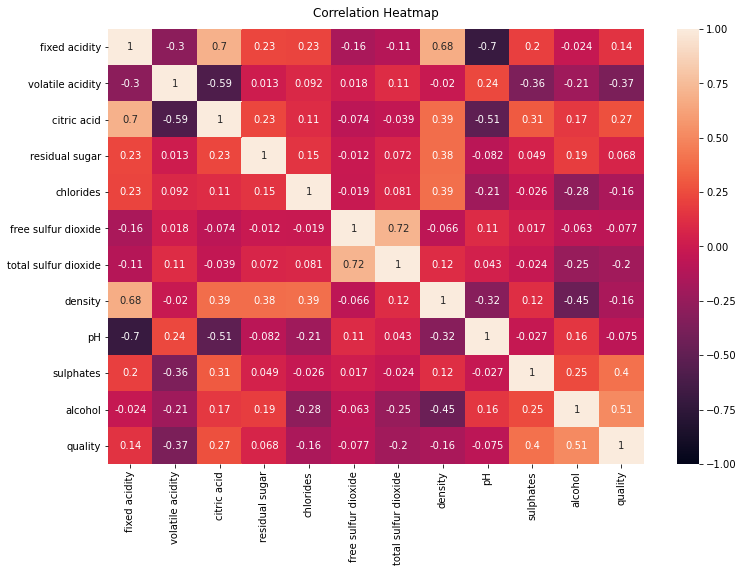

In [15]:
heatmap = sns.heatmap(wineQT.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
plt.show()

## Variance Thresholding

In [16]:
from sklearn.feature_selection import VarianceThreshold

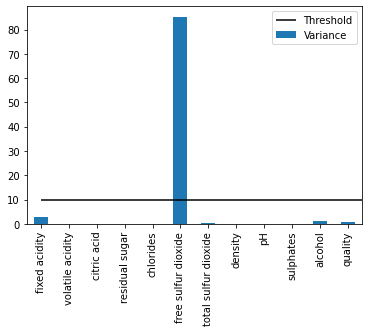

In [17]:
ax = wineQT.var(0).plot(kind='bar', label='Variance')
ax.hlines(10, 0, 13, label='Threshold')
plt.legend()

In [18]:
vt = VarianceThreshold(threshold=10)
x_reduced = vt.fit_transform(wineQT)
wineQT.columns[vt.get_support()]

Index(['free sulfur dioxide'], dtype='object')

In [19]:
x_reduced

array([[11.],
       [25.],
       [15.],
       ...,
       [32.],
       [39.],
       [32.]])

In [20]:
wineQT.var(0)

fixed acidity            2.721579
volatile acidity         0.029069
citric acid              0.036732
residual sugar           0.085631
chlorides                0.052902
free sulfur dioxide     85.234030
total sulfur dioxide     0.457110
density                  0.000003
pH                       0.020521
sulphates                0.016320
alcohol                  1.058778
quality                  0.615967
dtype: float64

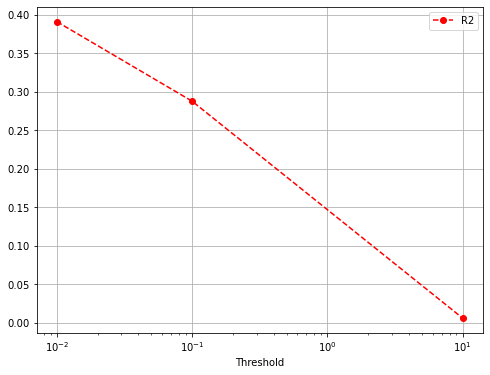

In [21]:
X = wineQT.drop("quality",axis=1)
Y = wineQT.quality

thresholds = [0.01, 0.1, 10]
r2 = []
n_cols = []
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
for t in thresholds:
    vt = VarianceThreshold(threshold=t)
    x_red = vt.fit_transform(X)
    n_cols.append(x_red.shape[1])
    lr = LinearRegression().fit(x_red, Y)
    p = lr.predict(x_red)
    r2.append(r2_score(Y, p))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds, r2, 'ro--', label='R2')
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('Threshold')
_ = ax.legend()

## Test-Train Split, Feature Selection

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3,stratify=Y, random_state = 42)

In [23]:
# Standardization for X variables 
sc= StandardScaler()
sc.fit(X_train)
# Fitting Logistic model 
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(sc.transform(X_train), Y_train)
# Rank features by importance
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
1,volatile acidity,0.880254
0,fixed acidity,0.823832
5,free sulfur dioxide,0.529987
8,pH,0.482383
3,residual sugar,0.298059
9,sulphates,0.262495
2,citric acid,-0.160074
7,density,-0.281743
4,chlorides,-0.295069
10,alcohol,-0.534642


## Model Building 

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error ,mean_squared_error, median_absolute_error, explained_variance_score
 

In [25]:
X = wineQT.drop("quality", axis = 1)
Y = wineQT['quality']

### Linear Regression 

In [26]:
Lr = LinearRegression()
mod_train = Lr.fit(X_train, Y_train)
mod_pred = Lr.predict(X_test)
print("Mean Squared Error: \n{}".format(mean_squared_error(Y_test, mod_pred)))
print("Mean Absolute Error: \n{}".format(mean_absolute_error(Y_test, mod_pred)))
print("Median Absolute Error: \n{}".format(median_absolute_error(Y_test, mod_pred)))
print("Explained Variance: \n{}".format(explained_variance_score(Y_test, mod_pred)))
print("Score the X-train with Y-train is : ", Lr.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", Lr.score(X_test,Y_test))

Mean Squared Error: 
0.3634739179892636
Mean Absolute Error: 
0.46774257270113667
Median Absolute Error: 
0.3743868322004289
Explained Variance: 
0.41503351911305175
Score the X-train with Y-train is :  0.3746785966301496
Score the X-test  with Y-test  is :  0.41480400539868256


### Classification Models (Logistic Regression, Decision Tree, Random Forest, SVC)

In [27]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", Logit.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", Logit.score(X_test,Y_test))

Y_pred=Logit.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))

Score the X-train with Y-train is :  0.6098901098901099
Score the X-test  with Y-test  is :  0.6006389776357828
 Mean absolute error is  0.4281150159744409
 Mean squared  error is  0.48562300319488816
 Median absolute error is  0.0
Accuracy score  0.6006389776357828


In [28]:
DT=DecisionTreeClassifier()

DT.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", DT.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", DT.score(X_test,Y_test))

Y_pred=Logit.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.5591054313099042
 Mean absolute error is  0.4281150159744409
 Mean squared  error is  0.48562300319488816
 Median absolute error is  0.0
Accuracy score  0.6006389776357828


In [29]:
RF=RandomForestClassifier()

RF.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", RF.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", RF.score(X_test,Y_test))

Y_pred=Logit.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.6325878594249201
 Mean absolute error is  0.4281150159744409
 Mean squared  error is  0.48562300319488816
 Median absolute error is  0.0
Accuracy score  0.6006389776357828


In [30]:
svc=SVC()

svc.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", svc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", svc.score(X_test,Y_test))

Y_pred=Logit.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))

Score the X-train with Y-train is :  0.5370879120879121
Score the X-test  with Y-test  is :  0.5623003194888179
 Mean absolute error is  0.4281150159744409
 Mean squared  error is  0.48562300319488816
 Median absolute error is  0.0
Accuracy score  0.6006389776357828
